In [13]:
# import essential libraries
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# read data
df = pd.read_csv('Linear Regression - Sheet1.csv')

# 显示数据的前几行，以检查数据是否正确读取
print(df.head())

   X         Y
0  1  3.888889
1  2  4.555556
2  3  5.222222
3  4  5.888889
4  5  6.555556


In [33]:
# create x_train,y_train variables
x_train = df.iloc[:, 0].to_numpy() # 读取dataframe的某列，转成array
y_raw = df.iloc[:, -1].to_numpy()
y_train = np.round(y_raw, 2)

# 检查读取是否正确
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

In [21]:
# check the number of training examples
length = len(x_train)
print(f"Number of training examples is: {length}")

Number of training examples is: 300


<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [22]:
# Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b   # 函数（1）
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost   # 函数（2）

    return total_cost

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [23]:
# calculate the gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m  # 函数（4）
    dj_db = dj_db / m  # 函数（5）
        
    return dj_dw, dj_db

In [24]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [40]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-5
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.43e+03  dj_dw: -2.018e+04, dj_db: -1.022e+02   w:  2.018e-01, b: 1.02217e-03
Iteration 1000: Cost 1.35e+02  dj_dw:  7.291e-03, dj_db: -1.461e+00   w:  6.694e-01, b: 1.79807e-02
Iteration 2000: Cost 1.35e+02  dj_dw:  7.273e-03, dj_db: -1.457e+00   w:  6.693e-01, b: 3.25688e-02
Iteration 3000: Cost 1.35e+02  dj_dw:  7.255e-03, dj_db: -1.453e+00   w:  6.692e-01, b: 4.71207e-02
Iteration 4000: Cost 1.35e+02  dj_dw:  7.237e-03, dj_db: -1.450e+00   w:  6.691e-01, b: 6.16364e-02
Iteration 5000: Cost 1.35e+02  dj_dw:  7.219e-03, dj_db: -1.446e+00   w:  6.691e-01, b: 7.61160e-02
Iteration 6000: Cost 1.35e+02  dj_dw:  7.201e-03, dj_db: -1.443e+00   w:  6.690e-01, b: 9.05597e-02
Iteration 7000: Cost 1.35e+02  dj_dw:  7.183e-03, dj_db: -1.439e+00   w:  6.689e-01, b: 1.04967e-01
Iteration 8000: Cost 1.35e+02  dj_dw:  7.165e-03, dj_db: -1.435e+00   w:  6.688e-01, b: 1.19339e-01
Iteration 9000: Cost 1.35e+02  dj_dw:  7.147e-03, dj_db: -1.432e+00   w:  6.688e-01, b: 1.33676e-01


In [41]:
def compute_model_output(x, w_final, b_final):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w_final * x[i] + b_final
        
    return f_wb

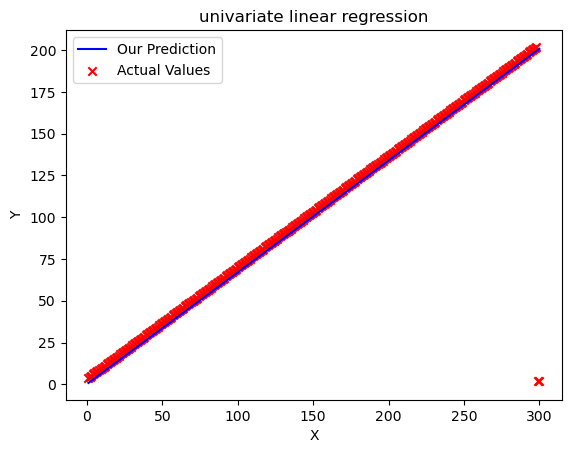

In [42]:
esti_f_wb = compute_model_output(x_train, w_final, b_final)

# Plot our model prediction
plt.plot(x_train, esti_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("univariate linear regression")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.legend()
plt.show()

In [43]:
# prediction more
print(f"x=200 prediction y={w_final*200 + b_final:0.1f} ")
print(f"x=210 prediction y={w_final*210 + b_final:0.1f} ")
print(f"x=230 prediction y={w_final*230 + b_final:0.1f} ")

x=200 prediction y=133.9 
x=210 prediction y=140.6 
x=230 prediction y=154.0 
